# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows',500)

# Load Data


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print('Shape of the dataframe:',df.shape)
print('\n----------------------------------------------------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------------------------------------------------\n')
df.head()

Shape of the dataframe: (13320, 9)

----------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None

----------------------------------------------------------------------------------------------



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**"total_sqft" & "size"** column should be **float** or **int**, but it is object data type. Hence, probably something is weird about this column

# Data Cleaning

## *Check and remove duplicated values*

In [3]:
print(df.duplicated().sum())
print(len(df))
df[df.duplicated]


529
13320


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [4]:
df.drop_duplicates(inplace=True)
print(len(df))
df.duplicated().sum()

12791


0

## *Handling missing value*

In [5]:
print('Number of missing data for each columns\n',df.isnull().sum())
print('\n----------------------------------------------------------------------------------------------\n')
print('Percentage of missing data for each columns(%)\n',round(df.isnull().sum()/len(df)*100,2))

Number of missing data for each columns
 area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

----------------------------------------------------------------------------------------------

Percentage of missing data for each columns(%)
 area_type        0.00
availability     0.00
location         0.01
size             0.13
society         41.65
total_sqft       0.00
bath             0.57
balcony          4.73
price            0.00
dtype: float64


**'Society'** has a lot of missing values and don't have meaningful information for the model. We will remove this column.

In [6]:
"""
df = df.drop(columns=['society'])
same thing
"""
df = df.drop(['society'],axis=1)
#df1.shape

## *Imputing missing value for 'balcony'*

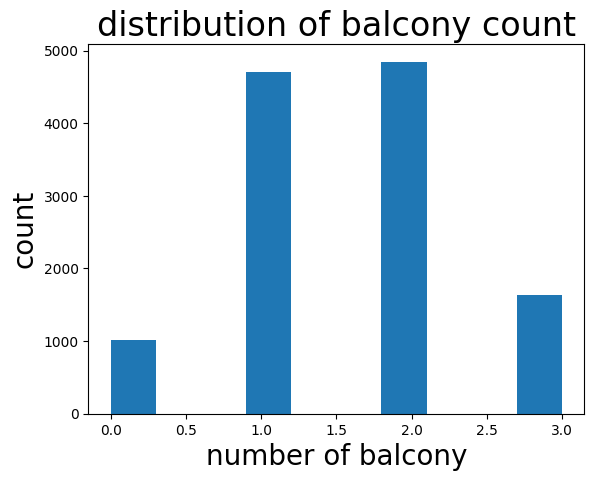

In [7]:
plt.hist(df.balcony)
plt.xlabel('number of balcony',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('distribution of balcony count',fontsize=24)
plt.show()

**"balcony"** has a roughly gaussian distribution, we will take the mean value of balcony to impute the missing value

In [8]:
balcony_mean = np.floor(df.balcony.mean())
df['balcony'].fillna(balcony_mean, inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
print('Number of missing data for each columns\n',df.isnull().sum())
print('\n----------------------------------------------------------------------------------------------\n')
print('Percentage of missing data for each columns(%)\n',round(df.isnull().sum()/len(df)*100,2))

Number of missing data for each columns
 area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

----------------------------------------------------------------------------------------------

Percentage of missing data for each columns(%)
 area_type       0.00
availability    0.00
location        0.01
size            0.13
total_sqft      0.00
bath            0.57
balcony         0.00
price           0.00
dtype: float64


Remaining missing value is insignificant, we will just drop them.

In [10]:
df.dropna(axis=0,inplace=True)
print(df.isnull().sum())
len(df)

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


12717

# Feature Engineering

In [11]:
df.nunique()

area_type          4
availability      80
location        1304
size              31
total_sqft      2067
bath              19
balcony            4
price           1955
dtype: int64

since **'size'** column have word, create another column with only the number of room

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# b = 'x bhk'
# x = b.split(' ')
# x

In [14]:
df['rooms'] = df['size'].apply(lambda x : int(x.split(' ')[0]) )
df.drop(columns='size',inplace=True)

In [15]:
# """
# def bhk(x):
#     x = str(x)
#     y = x[0]
#     return y
    
# df.bhk = df.size.apply(bhk)
# """
# df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [16]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
df.rooms.value_counts()

rooms
2     5244
3     4630
4     1376
1      631
5      347
6      221
7       99
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

(array([1.2228e+04, 4.6300e+02, 2.0000e+01, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

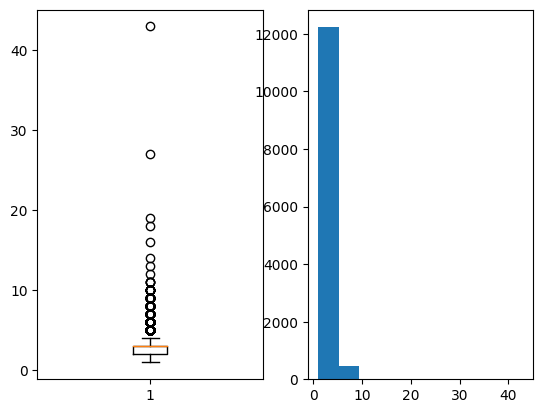

In [18]:
plt.subplot(1,2,1)
plt.boxplot(df.rooms)
plt.subplot(1,2,2)
plt.hist(df.rooms)

In [19]:
df[df.rooms >= 10]

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
459,Super built-up Area,Ready To Move,1 Giri Nagar,5000,9.0,3.0,360.0,11
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,8000,27.0,0.0,230.0,27
1735,Plot Area,Ready To Move,Kadarenahalli,750,10.0,1.0,90.0,10
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,1200,11.0,0.0,170.0,11
1795,Plot Area,18-Apr,SBM Colony,1660,10.0,1.0,475.0,10
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,12000,12.0,1.0,525.0,10
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,2000,16.0,1.0,490.0,19
3523,Plot Area,Ready To Move,Jigani,1200,10.0,1.0,105.0,10
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,10000,16.0,1.0,550.0,16
3853,Plot Area,Ready To Move,1 Annasandrapalya,1200,6.0,3.0,150.0,11


## *'total_sqft'*

In [20]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_float)].head(50)

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,4125Perch,9.0,1.0,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [23]:
def unit_comversion_to_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ( float(tokens[0]) + float(tokens[1]) ) / 2
    else:
        return x

In [24]:
def unit_comversion_to_sqft1(x):
    conversion_factors={
        'sq. meter': 10.7639,
        'sq. yards': 9,
        'acres': 43560,
        'guntha': 1089,
        'cents': 435.56,
        'grounds': 2400,
        'perch': 272.25
    }
    try:
        match = re.search(r'(\d+\.?\d*)\s*(\w+\.?\s*\w*)', x)
        if match:
            num = float(match.group(1))
            unit = match.group(2).lower()
            
            if unit in conversion_factors:
                return num * conversion_factors[unit]
            else:
                return x
        else:
            return x
    except:
        return x

In [25]:
 df.total_sqft =  df.total_sqft.apply(unit_comversion_to_sqft)

In [26]:
 df.total_sqft =  df.total_sqft.apply(unit_comversion_to_sqft1)

In [27]:
df[~df.total_sqft.apply(is_float)]

,area_type,availability,location,total_sqft,bath,balcony,price,rooms


In [28]:
df.total_sqft = df.total_sqft.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12717 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12717 non-null  object 
 1   availability  12717 non-null  object 
 2   location      12717 non-null  object 
 3   total_sqft    12717 non-null  float64
 4   bath          12717 non-null  float64
 5   balcony       12717 non-null  float64
 6   price         12717 non-null  float64
 7   rooms         12717 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 894.2+ KB


In [29]:
df.head(50)

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.00,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.00,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.00,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.00,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.00,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,1170.00,2.0,1.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,2732.00,4.0,1.0,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300.00,4.0,1.0,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,1310.00,3.0,1.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,1020.00,6.0,1.0,370.00,6


## *'availability'*

In [30]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [31]:
df.availability = df.availability.apply(lambda x: 1.0 if x =='Ready To Move' else 0.0)
df.availability.unique()

array([0., 1.])

In [32]:
# df.availability = df.availability.apply(lambda x : 1 if x == 'Ready To Move' else 0)
# df.availability.unique()

In [33]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,0.0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,1.0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,1.0,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,1.0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,1.0,Kothanur,1200.0,2.0,1.0,51.00,2


## *'location'*

In [34]:
df.location = df.location.apply(lambda x : x.strip())
print(df['location'].nunique())
location_stats = df.location.value_counts()
location_stats

1293


location
Whitefield                        518
Sarjapur  Road                    372
Electronic City                   289
Kanakpura Road                    242
Thanisandra                       231
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1060

In [36]:
# label location with less than 10 data points as "others", by doing this we reduce the number of categories.
location_less_than_11 = location_stats[location_stats<=10]
df.location = df.location.apply(lambda x : 'others' if x in location_less_than_11 else x)
df.location.nunique()

234

# Outliers Removal

Create a new feature "price per sqft" to remove the outlier

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12717 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12717 non-null  object 
 1   availability  12717 non-null  float64
 2   location      12717 non-null  object 
 3   total_sqft    12717 non-null  float64
 4   bath          12717 non-null  float64
 5   balcony       12717 non-null  float64
 6   price         12717 non-null  float64
 7   rooms         12717 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 894.2+ KB


In [38]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
0,Super built-up Area,0.0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,1.0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,1.0,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,1.0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,1.0,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [39]:
df = df[~(df.total_sqft/df.rooms<300)]
df.shape

(11979, 9)

In [40]:
df_or = df.copy()

C:\Users\lovep\AppData\Local\Temp\ipykernel_30384\1011517658.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_or[feature], ax=axes[i])
C:\Users\lovep\AppData\Local\Temp\ipykernel_30384\1011517658.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_or[feature], ax=axes[i])
C:\Users\lov

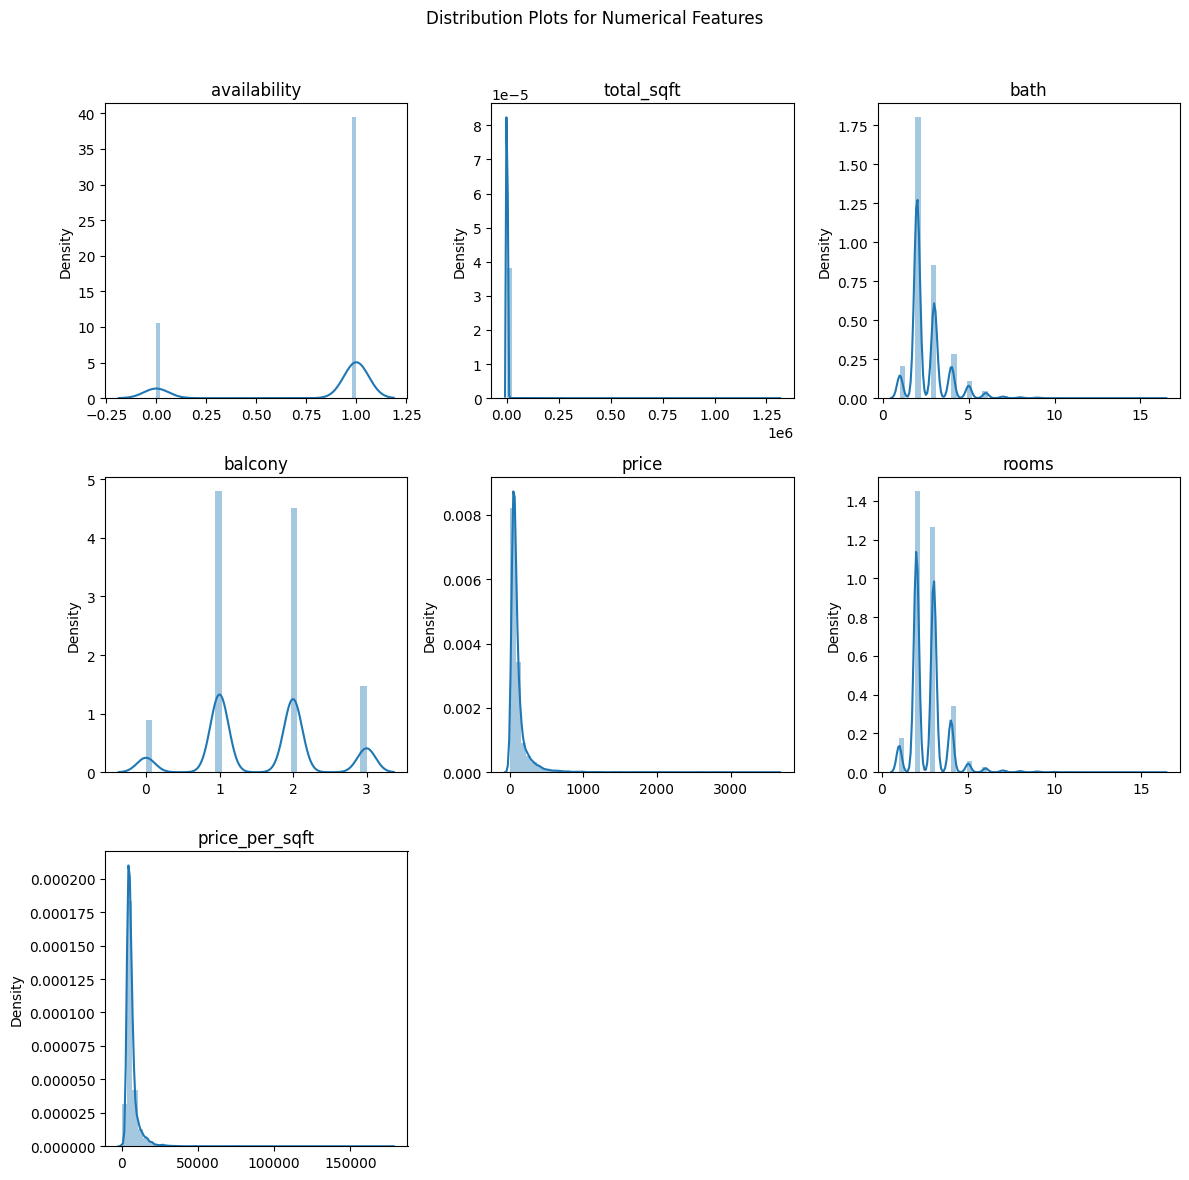

In [41]:
# df_or_numerical = df_or.select_dtypes(exclude=['object'])
# plt.subplot()
# for feature in df_or_numerical:
#     sns.distplot(df_or[feature])
#     plt.show()

# Assuming df_or is your DataFrame

df_or_numerical = df_or.select_dtypes(exclude=['object'])
num_features = df_or_numerical.columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed
num_rows = (len(num_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.suptitle('Distribution Plots for Numerical Features')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over numerical features and plot in subplots
for i, feature in enumerate(num_features):
    sns.distplot(df_or[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel(None)  # Optional: Remove x-axis label for clarity

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [42]:
df.price_per_sqft.describe()

count     11979.000000
mean       6358.253985
std        4234.006219
min           2.257423
25%        4242.424242
50%        5324.675325
75%        6969.602685
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [44]:
df1 = remove_pps_outliers(df)
df1.shape

(9865, 9)

In [45]:
def plot_scatter_chart(df,location):
    two_rooms = df[(df.location==location) & (df.rooms ==2)]
    three_rooms = df[(df.location==location) & (df.rooms ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(two_rooms.total_sqft, two_rooms.price,color='b',label='2 rooms', s=70, marker='*')
    plt.scatter(three_rooms.total_sqft, three_rooms.price,color='r',label='3 rooms', s=70, marker='.')
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

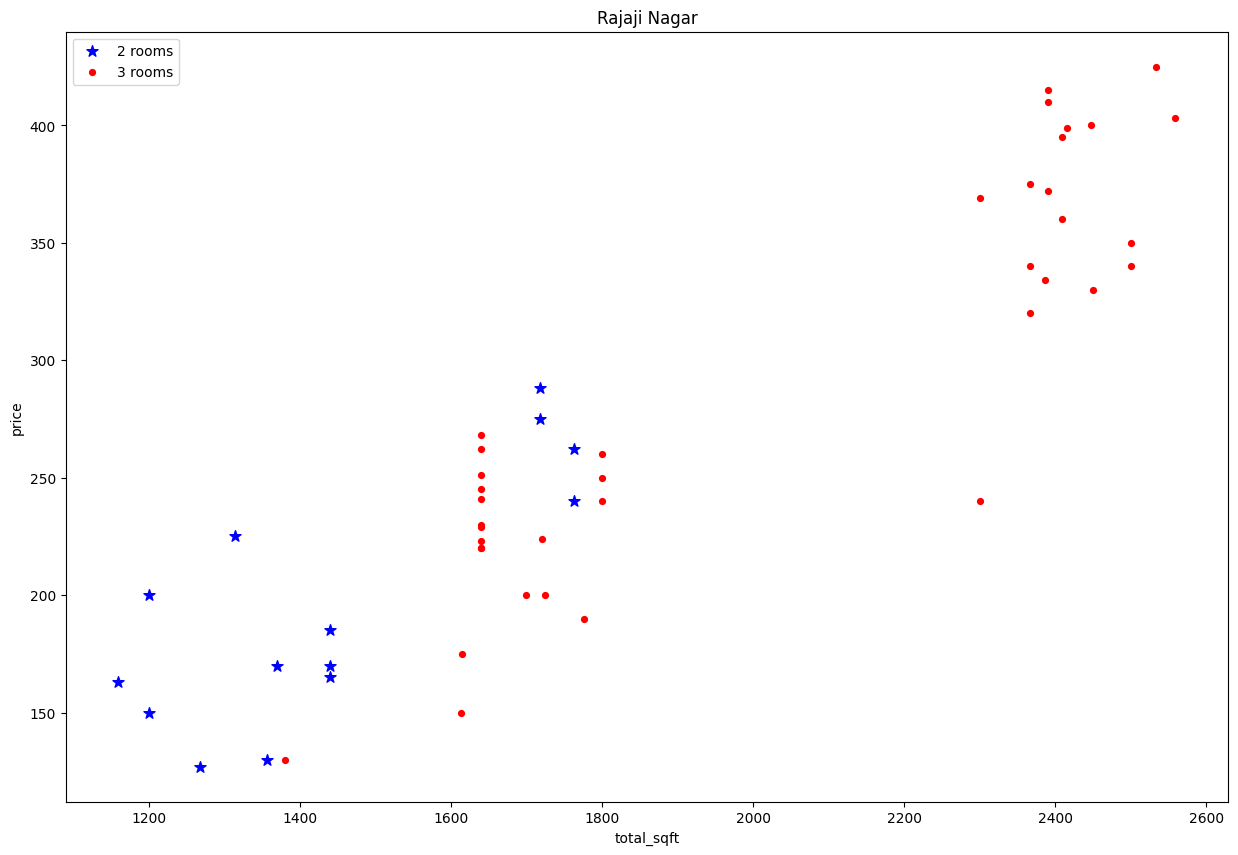

In [46]:
plot_scatter_chart(df1,"Rajaji Nagar")

In [47]:
def remove_rooms_outliers(df):
    exclude_indices = np.array([])
    for locations, location_df in df.groupby('location'):
        rooms_stats = {}
        
        for rooms, rooms_df in location_df.groupby('rooms'):
            rooms_stats[rooms]={
                'mean' : np.mean(rooms_df.price_per_sqft),
                'std' : np.std(rooms_df.price_per_sqft),
                'count' : rooms_df.shape[0]
            }
        
        for rooms,rooms_df in location_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,rooms_df[rooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [48]:
df1 = remove_rooms_outliers(df1)
df1.shape

(7040, 9)

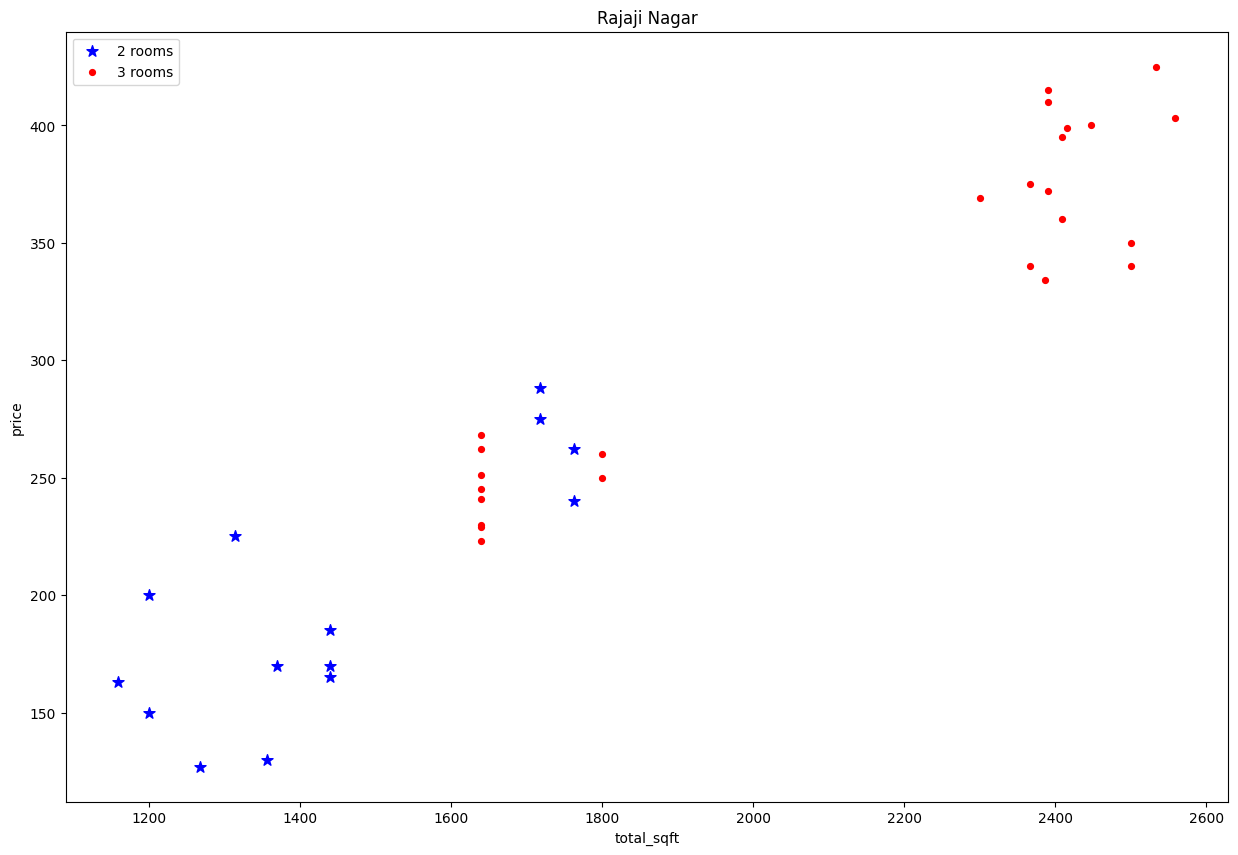

In [49]:
plot_scatter_chart(df1,'Rajaji Nagar')

Text(0, 0.5, 'Count')

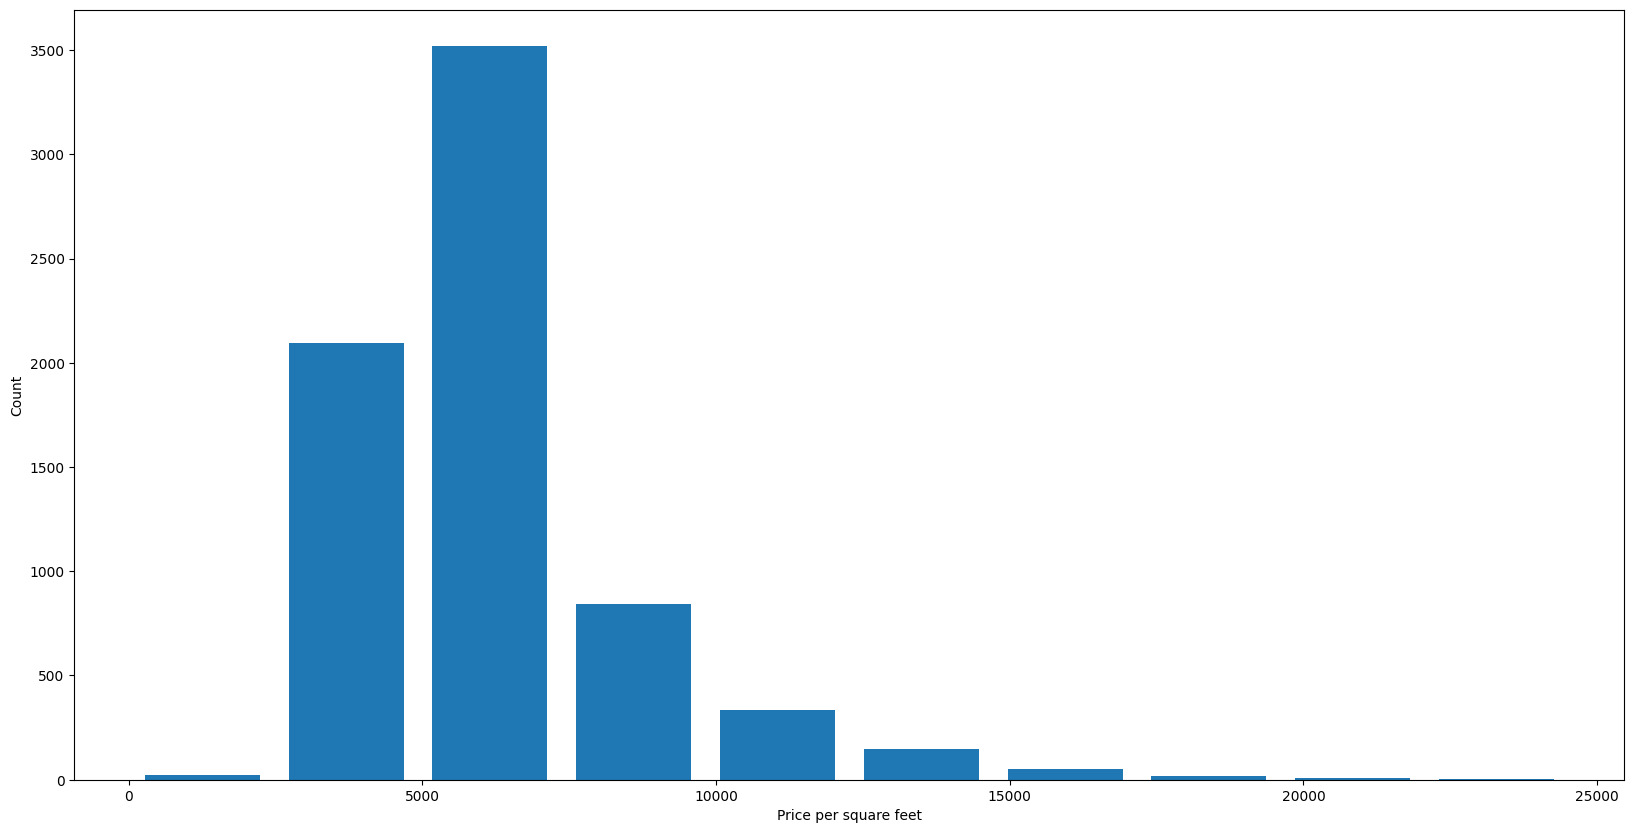

In [50]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

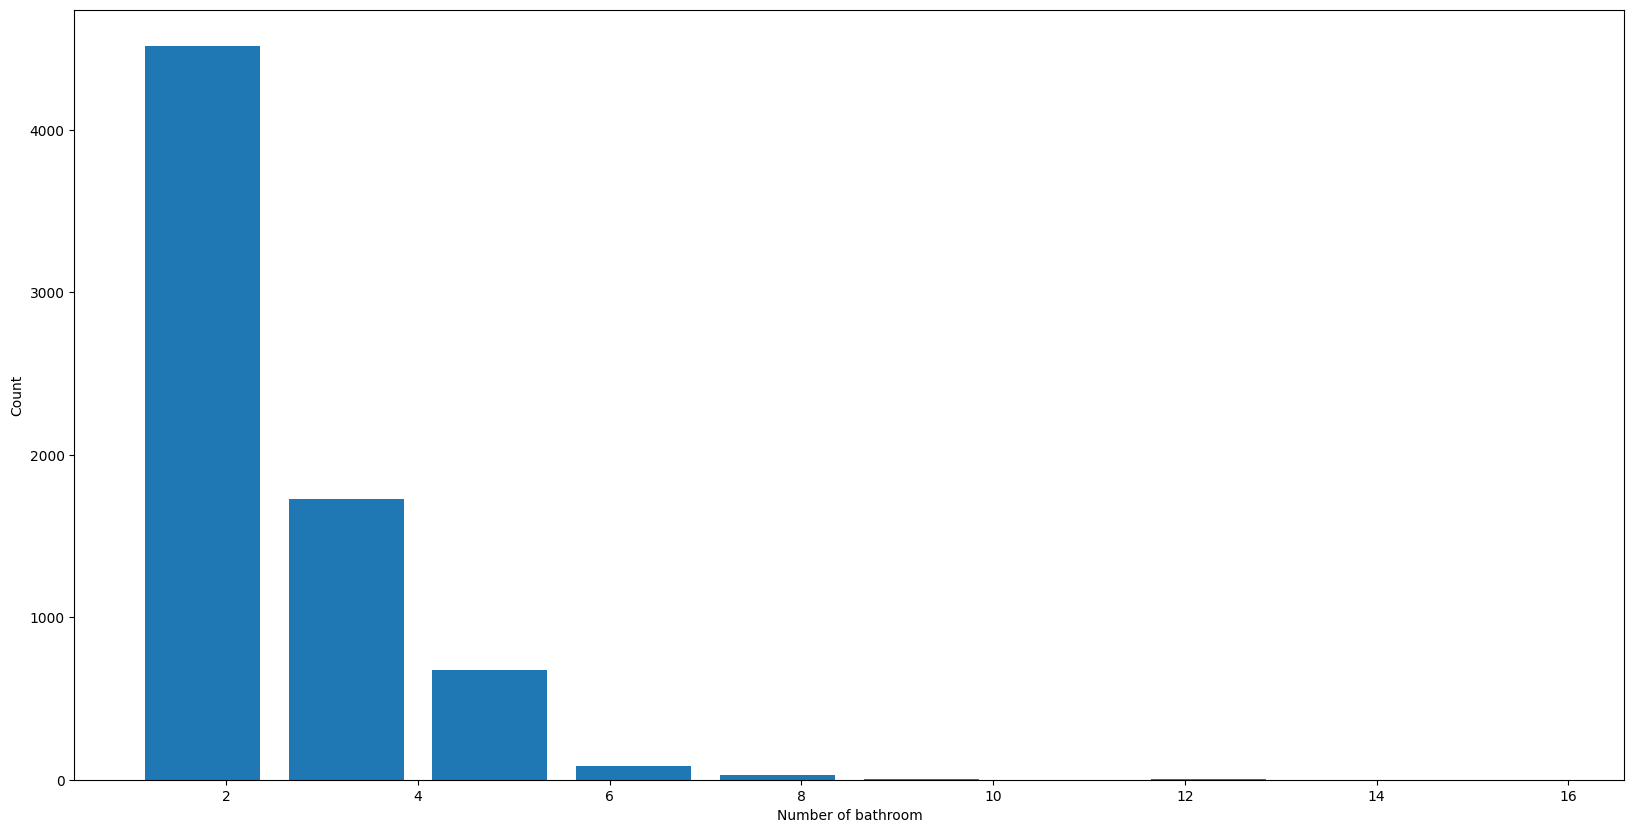

In [51]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel('Number of bathroom')
plt.ylabel('Count')

In [52]:
df1 = df1[df1.bath<df1.rooms+2]
df1.shape

(6960, 9)

In [53]:
df_out = df1.drop(['price_per_sqft'],axis=1)

In [54]:
df_out.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,0.0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,0.0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1.0,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,0.0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,0.0,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [55]:
y = df_out.price
df_out.drop(columns='price',inplace=True)
df_out = pd.concat([df_out,y],axis=1)
df_out.head()

,area_type,availability,location,total_sqft,bath,balcony,rooms,price
0,Super built-up Area,0.0,1st Block Jayanagar,2850.0,4.0,1.0,4,428.0
1,Super built-up Area,0.0,1st Block Jayanagar,1630.0,3.0,2.0,3,194.0
2,Super built-up Area,1.0,1st Block Jayanagar,1875.0,2.0,3.0,3,235.0
3,Built-up Area,0.0,1st Block Jayanagar,1200.0,2.0,0.0,3,130.0
4,Super built-up Area,0.0,1st Block Jayanagar,1235.0,2.0,2.0,2,148.0


In [56]:
len(df_out)

6960

# Save the cleaned data in a new csv file

In [57]:
df_out.to_csv('data/Bengaluru_House_Data_cleaned.csv',index=False)

In [58]:
pd.read_csv('data/Bengaluru_House_Data_cleaned.csv')

,area_type,availability,location,total_sqft,bath,balcony,rooms,price
0,Super built-up Area,0.0,1st Block Jayanagar,2850.0,4.0,1.0,4,428.0
1,Super built-up Area,0.0,1st Block Jayanagar,1630.0,3.0,2.0,3,194.0
2,Super built-up Area,1.0,1st Block Jayanagar,1875.0,2.0,3.0,3,235.0
3,Built-up Area,0.0,1st Block Jayanagar,1200.0,2.0,0.0,3,130.0
4,Super built-up Area,0.0,1st Block Jayanagar,1235.0,2.0,2.0,2,148.0
...,...,...,...,...,...,...,...,...
6955,Super built-up Area,1.0,others,1155.0,2.0,1.0,2,64.0
6956,Carpet Area,0.0,others,1200.0,2.0,3.0,2,70.0
6957,Super built-up Area,1.0,others,1800.0,1.0,1.0,1,200.0
6958,Plot Area,0.0,others,812.0,1.0,0.0,1,26.0
